In [1]:
import numpy as np
import matplotlib.pyplot as plt

from time_propagator0 import TimePropagator

In [2]:
inputs = {
    'molecule':'h 0 0 0; h 0 0 1.4',
    'final_time':100,
    'time_step':0.1,
    
    'gauge':'length',
    'laser_approx':'dipole',
    
    'sample_dipole_moment':True,
    'sample_kinetic_momentum':True,
    
    'pulses':['p1'],
    'p1':{
        'pulse_class':'sin_sin2',
        'amplitude':0.01,
        'omega':0.3,
        'ncycles':3,
        'polarization':[0,0,1],
        'k_direction':[1,0,0],
    }
}

In [3]:
tp = TimePropagator('rcis',inputs=inputs,checkpoint=400)
tp.build()

output4 = tp.propagate()

100%|████████████████████████████████████████████████████| 1001/1001 [00:03<00:00, 293.76it/s]


/home/ea/programs/anaconda3/envs/env1/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


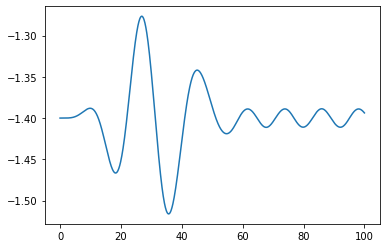

In [4]:
samples4 = output4['samples']

d4 = samples4['dipole_moment']
t4 = samples4['time_points']

plt.plot(t4,d4[:,2])
plt.show()

In [5]:
tp = TimePropagator('rcis',inputs='tp_ckpt_800.npz')
tp.build()

output5 = tp.propagate()

100%|██████████████████████████████████████████████████████| 201/201 [00:00<00:00, 263.21it/s]


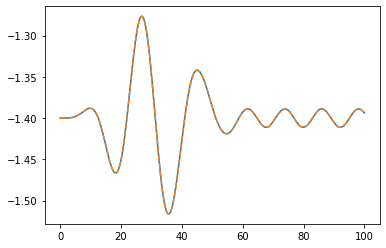

In [6]:
samples5 = output5['samples']

d5 = samples5['dipole_moment']
t5 = samples5['time_points']


plt.plot(t4,d4[:,2].real)
plt.plot(t5,d5[:,2].real,'--')
plt.show()

In [7]:
aa = np.load('tp_ckpt_800.npz',allow_pickle=True)
bb = dict(aa)
cc = {}
cc['samples'] = bb['samples'].item()
cc['inputs'] = bb['inputs'].item()
cc['arrays'] = bb['arrays'].item()
cc['log'] = bb['log'].item()
cc['misc'] = bb['misc'].item()


tp = TimePropagator('rcis',inputs=cc)
tp.build()

output55 = tp.propagate()

100%|██████████████████████████████████████████████████████| 201/201 [00:00<00:00, 262.11it/s]


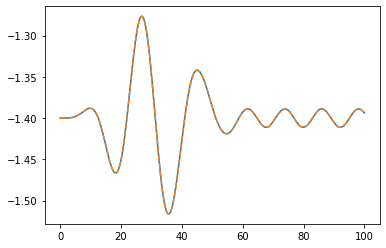

In [8]:
samples55 = output55['samples']

d55 = samples55['dipole_moment']
t55 = samples55['time_points']


plt.plot(t4,d4[:,2].real)
plt.plot(t55,d55[:,2].real,'--')
plt.show()

In [ ]:
tp = TimePropagator('rcis',inputs=inputs)
tp.setup_quantum_system('pyscf')
tp.setup_ground_state()
tp.build()
output = tp.propagate()

# Simplified setup

In [ ]:
tp = TimePropagator('rcis',inputs=inputs)
tp.build()
output = tp.propagate()

In [ ]:
print (output.keys())

In [ ]:
samples = output['samples']

d = samples['dipole_moment']
t = samples['time_points']

plt.plot(t,d[:,2].real)
plt.show()

# Extend run

In [ ]:
tp = TimePropagator('rcis',inputs=output,final_time=200)
tp.build()

output2 = tp.propagate()

In [ ]:
samples2 = output2['samples']

d2 = samples2['dipole_moment']
t2 = samples2['time_points']

print (output2['log'])

plt.plot(t2,d2[:,2].real)
plt.plot(t,d[:,2].real,'--')
plt.show()

# Add pulse

In [ ]:
p2 = {
        'pulse_class':'sin_sin2',
        'amplitude':0.005,
        'omega':0.1,
        'ncycles':2,
        't0':100,
        'polarization':[0,0,1],
     }

tp = TimePropagator('rcis',inputs=output,final_time=300)
tp.add_pulse('p2',p2)
tp.build()

output3 = tp.propagate()

In [ ]:
samples3 = output3['samples']

d3 = samples3['dipole_moment']
t3 = samples3['time_points']

plt.plot(t3,d3[:,2].real)
plt.plot(t,d[:,2].real,'--')
plt.show()

# Checkpoints

# Continue run from a checkpoint

# Laser approximations

In [ ]:
#dipole approximation
tp = TimePropagator('rcis',inputs=inputs,gauge='velocity')
tp.build()
output6 = tp.propagate()

#plane waves
tp = TimePropagator('rcis',inputs=inputs,gauge='velocity',laser_approx='plane_wave')
tp.build()
output7 = tp.propagate()

In [ ]:
samples6 = output6['samples']

d6 = samples6['dipole_moment']
t6 = samples6['time_points']

samples7 = output7['samples']

d7 = samples7['dipole_moment']
t7 = samples7['time_points']

plt.plot(t6,d6[:,2].real)
plt.plot(t7,d7[:,2].real,'--')
plt.show()

plt.plot(t6,d6[:,0].real)
plt.plot(t7,d7[:,0].real,'--')
plt.show()

# CC projectors

In [ ]:
inputs_projectors = {
    'molecule':'h 0 0 0; h 0 0 1.4',
    'final_time':20,
    'time_step':0.1,
    
    'gauge':'length',
    
    'sample_dipole_moment':True,
    'sample_kinetic_momentum':True,
    'sample_EOM_projectors':True,
    
    'reference_program':'dalton',
    
    'pulses':['p1'],
    'p1':{
        'pulse_class':'sin_sin2',
        'amplitude':0.01,
        'omega':1.13902514,
        'ncycles':3,
        'polarization':[0,0,1],
    }
}


tp = TimePropagator('rccsd',inputs=inputs_projectors)
tp.build()
output8 = tp.propagate()

In [ ]:
samples8 = output8['samples']

p8 = samples8['EOM_projectors']
t8 = samples8['time_points']


n = 5
for i in range(n):
    plt.plot(t8,p8[:,i].real,label=f'State {i+1}')
plt.legend()
plt.show()

# Post processing

In [ ]:
from time_propagator0.post_processing import (
    transient_dipole_spectrum_de,
    transient_dipole_spectrum_pia,
    transient_plane_wave_spectrum,
)

freq1, s1 = transient_dipole_spectrum_pia('ti_romp2_vel_400000.npz')
freq2, s2 = transient_plane_wave_spectrum('ti_romp2_vpi_400000.npz')

plt.plot(freq1,s1)
plt.plot(freq2,s2)

plt.axis([180,190,None,None])

plt.show()

plt.plot(freq1,s1)
plt.plot(freq2,s2)

plt.axis([181,181.7,-2e-5,1e-4])

plt.show()